In [1]:
import autoplier.model as ap
import autoplier.plot as plot
import csv
import h5py
import json
import matplotlib.pyplot as plt
import mygene
import numpy as np
from onto_lib import general_ontology_tools as got
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, average_precision_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

Unable to import pygraphviz. Visualization is disabled.
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\DOID.17-01-30.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\UBERON.17-01-30.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\CL.18-11-13.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\CVCL.17-01-30.obo ...
Loading ontology from C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\onto_lib\obo\EFO.17-01-30.obo ...


In [2]:
pathway_genes = []
pathway_names = []

with open('data/c8.all.v7.5.1.entrez.gmt', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        pathway_names += [row[0]]
        pathway_genes += [row[2:]]

with open("data/bulk_labels.json", 'r') as f:
    labels = json.load(f)

In [3]:
with open('data/validation_bulk_experiments.json', 'r') as f:
    validation_egs = json.load(f)

with open('data/pre_training_bulk_experiments.json', 'r') as f:
    train_egs = json.load(f)

In [4]:
mlb = MultiLabelBinarizer()
pathways = pd.DataFrame(mlb.fit_transform(pathway_genes), index = pathway_names, columns = mlb.classes_)

In [5]:
pathways

,1,10,100,1000,10000,100009676,10001,10002,100033413,100033435,...,9980,9982,9985,9987,9988,999,9990,9991,9992,9997
BUSSLINGER_ESOPHAGEAL_QUIESCENT_BASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_PROLIFERATING_BASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_EARLY_SUPRABASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_LATE_SUPRABASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAUTAM_EYE_IRIS_CILIARY_BODY_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_CORNEA_CYTOTOXIC_T_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_IRIS_CILIARY_BODY_CRYAA_HIGH_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_IRIS_CILIARY_BODY_COL9A1_HIGH_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mg = mygene.MyGeneInfo()
genes = pathways.columns.tolist()
info = mg.getgenes(genes, fields="ensembl")

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-19170...done.


In [7]:
not_in_db = []
rename = {}
for x in info:
    if("ensembl" in x):
        y = x["ensembl"]
        if(type(y) == list):
            y = y[0]
        rename[x["query"]] = y["gene"]
    else:
        not_in_db += [x["query"]]

In [8]:
pathways = pathways.drop(columns = not_in_db)
pathways = pathways.rename(columns=rename)

In [9]:
pathways = pathways.groupby(level = 0, axis = 1).first()

In [10]:
pathways

,126231,55872,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000288642,ENSG00000288647,ENSG00000288701,ENSG00000288722,ENSG00000288825,ENSG00000288859,ENSG00000288905,ENSG00000288920,ENSG00000289083,ENSG00000289524
BUSSLINGER_ESOPHAGEAL_QUIESCENT_BASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_PROLIFERATING_BASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_EARLY_SUPRABASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_LATE_SUPRABASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAUTAM_EYE_IRIS_CILIARY_BODY_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_CORNEA_CYTOTOXIC_T_CELLS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_IRIS_CILIARY_BODY_CRYAA_HIGH_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_IRIS_CILIARY_BODY_COL9A1_HIGH_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
hf = h5py.File('data/bulk_log_tpm.h5', 'r')
experiment = hf.get('experiment')[()].astype(str)
expression = hf.get('expression')[()].astype(float)
gene_id = hf.get('gene_id')[()].astype(str)

CellO_data = pd.DataFrame(expression, index = experiment, columns = gene_id)

In [12]:
CellO_data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284739,ENSG00000284740,ENSG00000284741,ENSG00000284742,ENSG00000284743,ENSG00000284744,ENSG00000284745,ENSG00000284746,ENSG00000284747,ENSG00000284748
SRX890545,0.071963,0.068414,3.718085,2.184815,1.490935,6.995514,0.629519,3.892468,3.241940,2.960884,...,0.0,0.247113,0.0,0.0,0.000000,0.254355,0.0,0.000000e+00,0.418459,0.105734
SRX1067711,0.033104,0.000000,3.743323,1.990195,1.780348,6.565519,0.045174,3.519702,3.266680,2.425106,...,0.0,1.319242,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.589718,0.087458
SRX1067710,0.233484,0.000000,3.376271,1.523096,0.611052,5.667817,0.013306,3.271395,3.490619,2.419673,...,0.0,0.176014,0.0,0.0,0.000000,0.108282,0.0,9.637153e-08,0.337275,0.153931
SRX762971,0.000000,0.000000,0.270898,0.272666,0.046180,4.310495,0.048563,0.505901,1.021726,0.468655,...,0.0,0.000000,0.0,0.0,0.000000,0.098300,0.0,0.000000e+00,0.161494,0.063805
SRX762970,0.000000,0.000000,0.000000,0.153331,0.029985,3.570165,0.012488,0.376561,0.298916,0.148210,...,0.0,0.124347,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.124297,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX3399308,0.900313,0.000000,4.034299,2.548069,1.914284,6.135145,1.561809,3.504841,2.099581,2.509156,...,0.0,0.551206,0.0,0.0,0.000000,0.784501,0.0,0.000000e+00,0.644274,0.084220
SRX3399309,0.317015,0.000000,3.972622,2.634532,2.009371,6.394950,1.277340,3.693114,2.188385,2.900505,...,0.0,0.000000,0.0,0.0,0.000000,0.596177,0.0,0.000000e+00,0.681857,0.204546
SRX3399310,0.799190,0.000000,4.109202,2.661645,2.445280,6.295505,1.314905,3.792382,1.471354,3.156924,...,0.0,0.000000,0.0,0.0,0.223545,0.152269,0.0,0.000000e+00,0.962468,0.265818
SRX3399311,0.044163,0.000000,4.007751,2.015217,1.989733,6.363111,0.788769,3.855940,2.337722,3.061316,...,0.0,0.000000,0.0,0.0,0.000000,0.269960,0.0,0.000000e+00,0.465199,0.145112


In [13]:
# Autoplier callbacks
callbacks = [
        #early stopping - to mitigate overfitting
        EarlyStopping(patience=100, monitor='val_loss'),
        #monitor umatrix sparsity
        ]

In [14]:
sample2types_full = {
        sample: list(map(got.get_term_name, types_ids))
        for sample, types_ids in labels.items()
    }
mlb_full = MultiLabelBinarizer()

types_per_samples = CellO_data.index.map(sample2types_full).values
samples_dummies = pd.DataFrame(mlb_full.fit_transform(types_per_samples), columns=mlb_full.classes_,
                                      index=CellO_data.index)

celltypes = samples_dummies.columns.tolist()

type2samples = {
    type_: samples_dummies.index[samples_dummies[type_] == 1].tolist()
    for type_ in celltypes
}
types_sizes = samples_dummies.sum()
types_with_data = types_sizes.index.values
all_types = samples_dummies.columns

In [15]:
def train_autoplier(X, pathways, seed, n_LVs):
    ap.set_seed_(seed)
    model = ap.autoPLIER(n_LVs, regval = 1.20E-7,learning_rate= 0.000156)
    model.fit(X, pathways, verbose=0, batch_size = None, callbacks = callbacks)
    Z = model.transform(X, pathways)
    
    print(ap.sparsity_epsilon(model.components_decomposition_, 1.0E-4))
    
    return Z, model

In [16]:
def compare_celltypes(celltype1, celltype2, pathways, seed, n_LVs):
    data_c1 = samples_dummies[celltype1][samples_dummies[celltype1] == 1]
    data_c2 = samples_dummies[celltype2][samples_dummies[celltype2] == 1]
    overlap_1 = ~data_c1.index.isin(data_c2.index)
    overlap_2 = ~data_c2.index.isin(data_c1.index)
    data_c1 = data_c1[overlap_1]
    data_c2 = data_c2[overlap_2]
    Z, model = train_autoplier(CellO_data[CellO_data.index.isin(data_c1.index.union(data_c2.index))], pathways, seed, n_LVs)
    return Z, model

In [17]:
Z, model = compare_celltypes("epithelial cell", "T cell", pathways, 111, 25)
print(Z)

0.9637142857142857
                  0         1         2         3         4    5          6   \
SRX1735869  0.000000  0.000000  0.000000  2.655813  0.000000  0.0   0.000000   
SRX1735868  0.000000  0.000000  0.000000  2.680905  0.000000  0.0   0.000000   
SRX1735863  0.000000  0.000000  0.000000  1.452877  0.000000  0.0   0.000000   
SRX1735862  0.000000  0.000000  0.000000  2.208329  0.000000  0.0   0.000000   
SRX1735867  0.000000  0.000000  0.000000  1.333205  0.000000  0.0   0.000000   
...              ...       ...       ...       ...       ...  ...        ...   
SRX3399287  0.620583  2.221879  1.080988  0.000000  3.464788  0.0  12.302117   
SRX3399288  0.567739  2.256356  1.197575  0.000000  0.976018  0.0  12.637370   
SRX3399289  0.903703  3.285234  1.445535  0.000000  1.108626  0.0  12.836987   
SRX3399290  0.306361  2.478349  1.220616  0.000000  1.491798  0.0  11.783723   
SRX3399291  0.000000  1.447514  0.000000  0.000000  0.000000  0.0  11.075807   

             7      

In [18]:
def classify(Z,celltype1, celltype2, mod):
    data_c1 = samples_dummies[celltype1][samples_dummies[celltype1] == 1]
    data_c2 = samples_dummies[celltype2][samples_dummies[celltype2] == 1]
    overlap_1 = ~data_c1.index.isin(data_c2.index)
    overlap_2 = ~data_c2.index.isin(data_c1.index)
    data_c1 = data_c1[overlap_1]
    data_c2 = data_c2[overlap_2]
    
    X_train = Z[Z.index.isin(data_c1.index.union(data_c2.index))]
    y_train = X_train.index.isin(data_c1.index).astype(int)
    
    pca_mod = PCA(n_components=2)
    X_pca = pca_mod.fit_transform(X_train)
    
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.scatter(X_pca[:,0], X_pca[:,1], c = y_train)
    plt.show()
    
    PARAMETERS = {
        'C': [
        0.001, 
        0.01, 
        0.1, 
        1.0,
        10.0,
        100.0
        ]
    }
    MAX_ITER = 200000

    lr_model = LogisticRegression(penalty='l1', solver='liblinear')

    clf = GridSearchCV(lr_model, PARAMETERS, scoring='f1')
    clf.fit(X_train, y_train)

    best_params = max(
        zip(
            clf.cv_results_['param_C'], 
            clf.cv_results_['mean_test_score']
        ),
        key=lambda x: x[1]
    )
    best_C = best_params[0]
    print('Mean test scores:')
    print(clf.cv_results_['mean_test_score'])
    print("Best C chosen: ", best_C)
    
    lr_model = LogisticRegression(penalty='l1', solver='liblinear', C=best_C)
    lr_model.fit(X_train, y_train)
    coeffs = lr_model.coef_
    coeffs = coeffs.squeeze()
    print(coeffs)
    
    largest = coeffs.argsort()[-3:]
    smallest = coeffs.argsort()[:3]
    
    largest_vals = [coeffs[x] for x in largest]
    smallest_vals = [coeffs[x] for x in smallest]
    
    print("LVs associated with classification of "+celltype1+" :" )
    print(largest)
    print(largest_vals)
    for lv in largest:
        plot.plot_top_pathways([lv], 5, (10,5), mod)
        plt.title(f'LV {lv}')
        plt.show()
    
    print("LVs associated with classification of "+celltype2+" :" )
    print(smallest)
    print(smallest_vals)
    for lv in smallest:
        plot.plot_top_pathways([lv], 5, (10,5), mod)
        plt.title(f'LV {lv}')

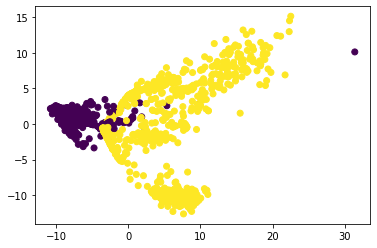

Mean test scores:
[0.92599214 0.98128357 0.98986431 0.99121411 0.98285944 0.97769034]
Best C chosen:  1.0
[-0.01766606  0.          0.          0.         -0.29882397  0.84654761
 -3.96643234  0.         -0.56658098  0.18821212  0.          0.
 -0.2036333   0.34958367  0.          0.          2.16179636  0.
  0.99472633  0.          1.06000599 -0.33532492  0.66097178  0.
  0.        ]
LVs associated with classification of epithelial cell :
[18 20 16]
[0.9947263325689518, 1.0600059885966033, 2.1617963610439914]


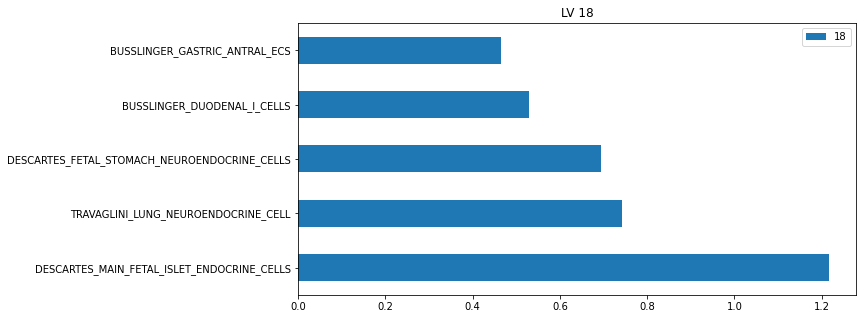

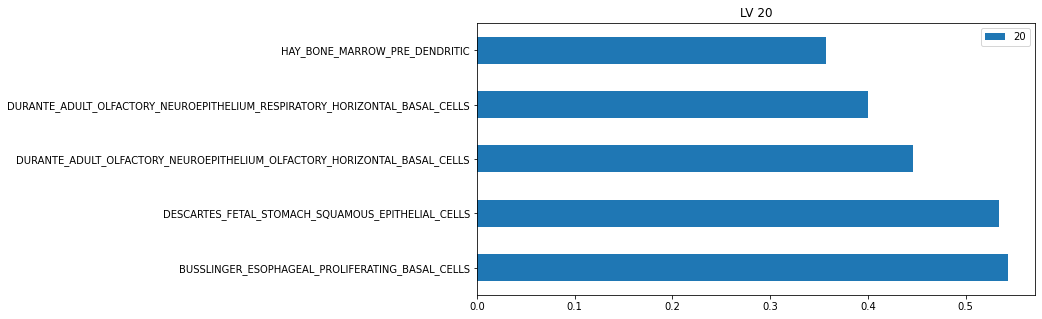

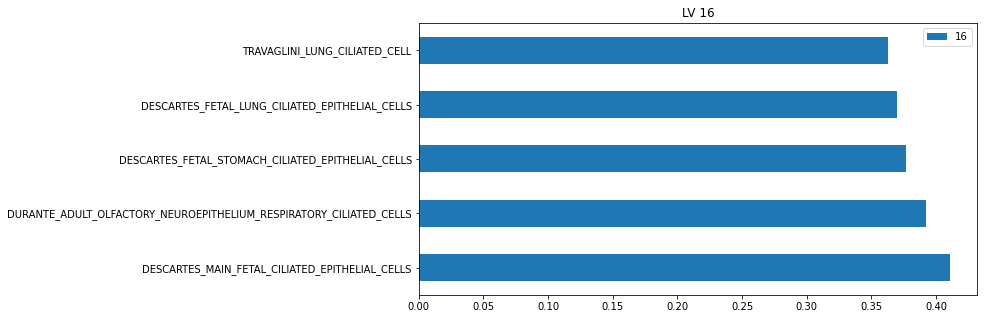

LVs associated with classification of T cell :
[ 6  8 21]
[-3.966432335532006, -0.5665809779937073, -0.3353249188014711]


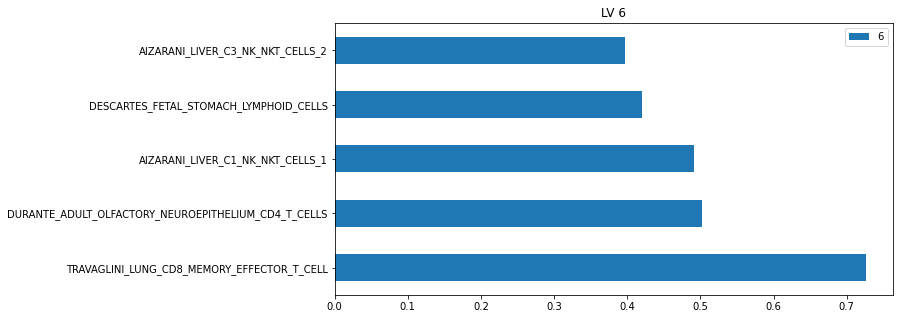

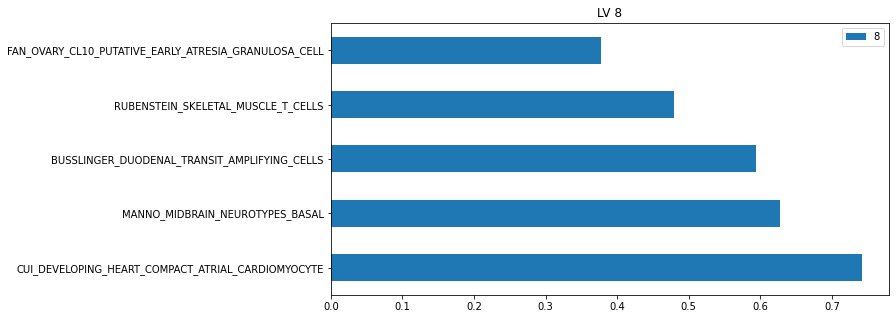

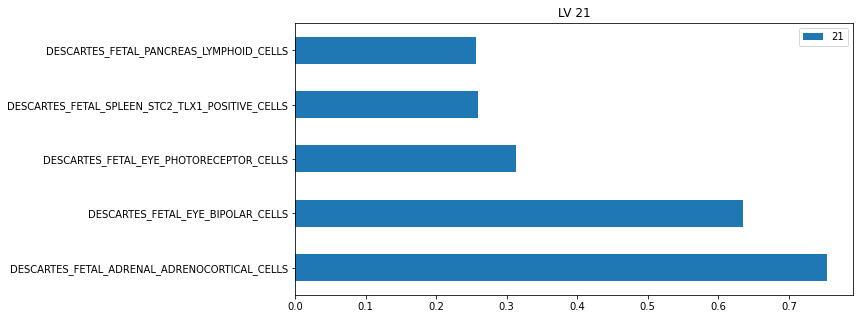

In [19]:
classify(Z,"epithelial cell", "T cell", model)